In [278]:
#Machine learning  
#Linear regression using single variable

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.DataFrame({
    'area': [2600,3000,3200,3600,4000],
    'price': [550000,565000,610000,680000,725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


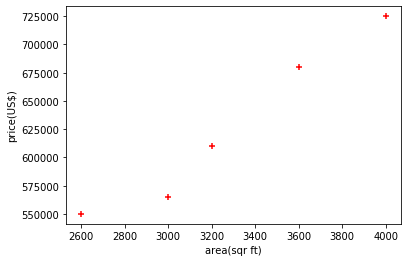

In [280]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [281]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
reg.predict([[3300]])

array([628715.75342466])

In [283]:
reg.coef_  #slope(m)

array([135.78767123])

In [284]:
reg.intercept_  #b's value

180616.43835616432

In [285]:
#y = m*x+b

135.78767123*3300+180616.43835616432

628715.7534151643

In [286]:
reg.predict([[5000]])

array([859554.79452055])

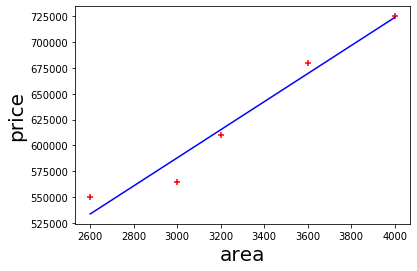

In [287]:
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [288]:
d = pd.DataFrame({
    'area': [1000,1500,2300,3500,4120,4560,5490,3460,4750,2300,9000,8000],
    
})
d

,area
0,1000
1,1500
2,2300
3,3500
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [289]:
d.head(3)

,area
0,1000
1,1500
2,2300


In [290]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        655873.28767123,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1266917.80821918])

In [291]:
d['prices'] = p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3500,6.558733e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [292]:
d.to_csv("prediction.csv",index = False) #if we have to export the prediction to the csv file that we have.

In [293]:
#Linear regression using multiple variable

In [294]:
f = pd.DataFrame({
    'area': [2600,3000,3200,3600,4000],
    'bedrooms': [3,4,0 ,3,5],
    'age': [20,15,18,30,8],
    'price': [550000,565000,610000,595000,760000]
})
f

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,0,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [295]:
#linear equation will be price = m1*area+m2*bedrooms+m3+age+b


In [296]:
import math
median_bedrooms=math.floor(f.bedrooms.median())
median_bedrooms

3

In [297]:
f.bedrooms=f.bedrooms.fillna(median_bedrooms)
f
#this will fill the median value in the missing value

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,0,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [298]:
reg = linear_model.LinearRegression()
reg.fit(f[['area','bedrooms','age']],f.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
reg.coef_

array([  120.07395326, -1761.98163423, -4850.61775289])

In [300]:
reg.intercept_

315724.62131516926

In [301]:
reg.predict([[3000,3,40]])

array([476635.82607446])

In [302]:
120.07395326*3000+-1761.98163423*3+-4850.61775289*40+315724.62131516926

476635.8260768793

In [303]:
reg.predict([[2500,4,5]])

array([584608.48916173])

In [304]:
#exercise 
#word to number
#pip install word2number(use the module)
#figure out salaries for two candidates 2 years,9test score,6 interview score
#12 yrs experience, 10 test score,10 interview score

In [305]:
#Gradient descent and cost function

In [306]:
#mean square error (mse=1/n(1to n (actual point to predicted point)^2)) 
# cost function  (mse=1/n(1to n (yi - (mxi + b))^2)) 

In [307]:
#Gradient descent is an algo that finds best fit line for given training data set
#calculating slope at points to see the best fit of the point, for that we need to work some calculus of one variable(f=x^2) and with two variable e.g (f = x^2+y^3)
#so we will calculate the partial derivative for the cost function.
#it becomes d/dm = 2/n(1 to n -xi(yi-(mxi+b)))
# d/db = 2/n(1 to n -(yi-(mxi+b)))
#after that we calculate the learning rate (  m = m-learning rate*d/dm)
#(b = b - learning rate*d/db)


In [308]:
import numpy as np
import matplotlib as plt
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001
    for i in range(iterations):
        y_predicted = m_curr*x+b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)]) #to find the cost
        
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate *bd
        print("m {}, b {} , iteration {}".format(m_curr,b_curr,i))

        

#to check which is the optimum point you can manipulate the iterations and learning rate and try to come up witht he closing point as possible and when you find that your cost starts to shift slope you stop, same goes for the iterations, when we see we get the m and b 's optimum value we stop.

In [309]:
x = np.array([1,2,3,4,5])
y= np.array([5,7,9,11,13])


In [310]:
gradient_descent(x,y)

m 0.062, b 0.018000000000000002 , iteration 0
m 0.122528, b 0.035592000000000006 , iteration 1
m 0.181618832, b 0.052785648000000004 , iteration 2
m 0.239306503808, b 0.069590363712 , iteration 3
m 0.29562421854195203, b 0.086015343961728 , iteration 4
m 0.35060439367025875, b 0.10206956796255283 , iteration 5
m 0.40427867960173774, b 0.11776180246460617 , iteration 6
m 0.4566779778357119, b 0.13310060678206653 , iteration 7
m 0.5078324586826338, b 0.14809433770148814 , iteration 8
m 0.5577715785654069, b 0.16275115427398937 , iteration 9
m 0.606524096911324, b 0.17707902249404894 , iteration 10
m 0.6541180926443106, b 0.1910857198675929 , iteration 11
m 0.7005809802869303, b 0.20477883987199186 , iteration 12
m 0.7459395256813859, b 0.2181657963105263 , iteration 13
m 0.7902198613385323, b 0.23125382756381693 , iteration 14
m 0.8334475014237017, b 0.2440500007406581 , iteration 15
m 0.8756473563879363, b 0.25656121573063456 , iteration 16
m 0.916843747253018, b 0.2687942091608457 , it

m 2.4537348317828354, b 1.3618732870842278 , iteration 966
m 2.4535814257611075, b 1.3624271315193623 , iteration 967
m 2.453428071605247, b 1.3629807887017569 , iteration 968
m 2.453274769297721, b 1.363534258694722 , iteration 969
m 2.453121518821003, b 1.364087541561546 , iteration 970
m 2.4529683201575714, b 1.364640637365497 , iteration 971
m 2.452815173289912, b 1.3651935461698206 , iteration 972
m 2.452662078200515, b 1.3657462680377415 , iteration 973
m 2.4525090348718774, b 1.366298803032463 , iteration 974
m 2.4523560432865015, b 1.3668511512171668 , iteration 975
m 2.4522031034268954, b 1.3674033126550136 , iteration 976
m 2.4520502152755737, b 1.367955287409142 , iteration 977
m 2.451897378815056, b 1.3685070755426703 , iteration 978
m 2.451744594027869, b 1.3690586771186946 , iteration 979
m 2.4515918608965435, b 1.36961009220029 , iteration 980
m 2.451439179403618, b 1.3701613208505101 , iteration 981
m 2.4512865495316354, b 1.3707123631323874 , iteration 982
m 2.45113397

In [311]:
#exercise
#to find the gradient use the lib (math.isclose(a,b,*,rel_tol = 1e-09,abs_tol=0.0))

In [312]:
#save module using joblib and pickle


In [313]:
#save and load trained model using
#pickle
#sklearn joblib

In [314]:
#using pickle
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [315]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [316]:
reg.coef_  #slope(m)

array([135.78767123])

In [317]:
reg.intercept_  #b's value

180616.43835616432

In [318]:
reg.predict([[5000]])

array([859554.79452055])

In [319]:
import pickle 

In [320]:

with open('reg_pickle','wb') as f:
    pickle.dump(reg,f)

In [321]:
with open('reg_pickle','rb') as f:
    mp = pickle.load(f)


In [322]:
mp.predict([[5000]])

array([859554.79452055])

In [323]:
#using sklearn joblib
#Note
#In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:


In [324]:
from sklearn.externals import joblib


In [325]:
joblib.dump(reg,'reg_joblib') #model is saved

['reg_joblib']

In [326]:
mj=joblib.load('reg_joblib',)

In [327]:
mj.predict([[5000]])

array([859554.79452055])

In [328]:
mj.coef_

array([135.78767123])

In [329]:
mj.intercept_

180616.43835616432

In [330]:
#Dummy Variable & one hot encoding


In [331]:
#Build a predictor function to predict price of home, 1) with 3400sqr ft area in west windsor   2) 2800 sqr ft home in robbinsville


In [332]:
#one way is handle the string in the model is to convert it to the number and assign it tring a number and make a group of them. but it will take it as a order which means e.g 1<2<3 etc
#these variables are called categorical variables , 1)nominal 2)ordinal
 

In [333]:
import pandas as pd
pf = pd.read_csv("D:\excel_files\homeprices.csv")
pf


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,west windsor,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,robbinsville,3600,710000
9,robbinsville,2600,575000


In [334]:
dummies = pd.get_dummies(pf.town)
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0


In [335]:
merged = pd.concat([pf,dummies],axis='columns')  
merged

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,west windsor,4000,725000,0,0,1
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,robbinsville,3600,710000,0,1,0
9,robbinsville,2600,575000,0,1,0


In [336]:
final = merged.drop(['town','west windsor'],axis = 'columns')
final

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,0,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,1
9,2600,575000,0,1


In [337]:
from sklearn.linear_model import LinearRegression
pf = LinearRegression()

In [338]:
x = final.drop('price',axis = 'columns')
x

,area,monroe township,robbinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,0,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,1
9,2600,0,1


In [339]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [340]:
pf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [341]:
pf.predict([[2800,0,1]])

array([598302.50050823])

In [342]:
pf.predict([[3400,0,0]])

array([669810.93718236])

In [343]:
pf.score(x,y) #how accurate your model is 

0.9424868186564617

In [344]:
pf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [345]:
pf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [346]:
pf = pd.read_csv("D:\excel_files\homeprices.csv")
pf

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,west windsor,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,robbinsville,3600,710000
9,robbinsville,2600,575000


In [347]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [348]:
dfle = pf
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,2,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,1,3600,710000
9,1,2600,575000


In [349]:
x = pf[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   2, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   1, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [350]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [351]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [352]:
x = ohe.fit_transform(x).toarray()
x

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [353]:
x = x[:,1:] #if you want to drop one column
x

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [354]:
pf.fit(x,y)

AttributeError: 'DataFrame' object has no attribute 'fit'

In [355]:
pf.predict([[1,0,2800]])

AttributeError: 'DataFrame' object has no attribute 'predict'

In [356]:
pf.predict([[0,1,3400]])

AttributeError: 'DataFrame' object has no attribute 'predict'

In [357]:
#exercise question

In [358]:
#Training and testing Data
#split available dataset into training and test using  (sklearn.model_selection.train_test_split)

In [359]:
#the best way to test and train your data is to divide your data into two parts one fpr training and one for testing. That way you an test the data which is not seen before while training. 

In [360]:
import pandas as pd
af = pd.read_csv("D:\excel_files\carprices.csv")
af.head()

,mileage,age(yrs),sell price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [361]:
import matplotlib.pyplot as plt
%matplotlib inline

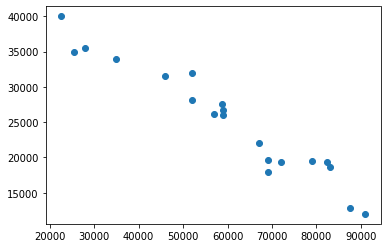

In [362]:
plt.scatter(af['mileage'],af['sell price($)'])

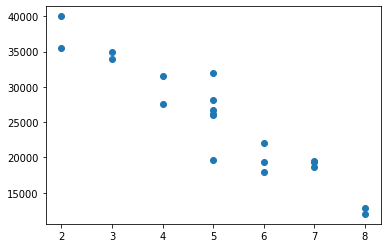

In [363]:
plt.scatter(af['age(yrs)'],af['sell price($)'])

In [364]:
x = af[['mileage','age(yrs)']]
y = af[['sell price($)']]

In [365]:
x

,mileage,age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [366]:
y

,sell price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [367]:
from sklearn.model_selection import train_test_split

In [368]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [369]:
len(x_train)

16

In [370]:
len(x_test)

4

In [371]:
x_train #it is selecting the random data for the training purpose so that the data we train wont be same all the time.

,mileage,age(yrs)
7,72000,6
16,28000,2
19,52000,5
9,67000,6
15,25400,3
8,91000,8
14,82450,7
1,35000,3
0,69000,6
12,59000,5


In [372]:
#sometimes we want the training data to be same, for that
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [373]:
x_train

,mileage,age(yrs)
7,72000,6
16,28000,2
19,52000,5
9,67000,6
15,25400,3
8,91000,8
14,82450,7
1,35000,3
0,69000,6
12,59000,5


In [374]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [375]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
clf.predict(x_test)

array([[26887.42158777],
       [37716.06683133],
       [25573.72819008],
       [29489.80506406]])

In [377]:
y_test

,sell price($)
6,32000
3,40000
2,26100
4,31500


In [378]:
clf.score(x_test,y_test)

0.6375466933695311

In [379]:
#Logistic regression (Binary classification)


In [380]:
#@) email is spam or not? 2) will customer buy life insurance?  3) which party a person os going to vote? democratic,republican,independent
#in linear regression the predicted value is continuous, but in logistic(classification) it is categorical
#Logistic regression is one of the techiques used for classification.
#in classfication , there are two types , binary (yes/no) , multi calss classification(1.democratic,2.repulican,3.independent)

In [381]:
#sigmoid or logit function
# z(sigmoid) = 1/1+e^-z where e is euler's number ~ 2.71828
#sigmoid function has range from 0 to 1.
# y = 1/(1+e^-(m*x+b))

In [382]:
sf = pd.read_csv("D:\excel_files\insurance.csv")
sf.head()

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


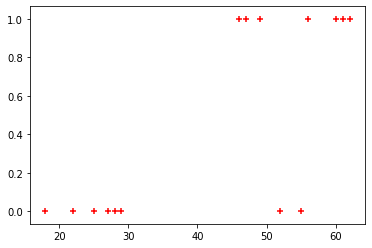

In [383]:
plt.scatter(sf.age,sf.have_insurance,marker='+',color='red')

In [384]:
sf.shape

(15, 2)

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
x_train,x_test,y_train,y_test =  train_test_split(sf[['age']],sf.have_insurance,train_size = 0.7)

In [387]:
x_test

,age
13,29
6,55
11,28
5,56
8,62


In [388]:
x_train

,age
10,18
9,61
14,49
2,47
4,46
7,60
3,52
1,25
0,22
12,27


In [389]:
from sklearn.linear_model import LogisticRegression

In [390]:
model = LogisticRegression()

In [391]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [392]:
model.predict(x_test)

array([0, 1, 0, 1, 1], dtype=int64)

In [393]:
model.score(x_test,y_test)

0.8

In [394]:
model.predict_proba(x_test)

array([[0.91618867, 0.08381133],
       [0.09921415, 0.90078585],
       [0.92880568, 0.07119432],
       [0.08449223, 0.91550777],
       [0.0309539 , 0.9690461 ]])

In [395]:
model.predict([[25]])

array([0], dtype=int64)

In [396]:
#exercise given

In [397]:
#Multiple classification (logistic classification)

In [398]:
#identify hand written digits recognition

In [399]:
from sklearn.datasets import load_digits

In [400]:
digits = load_digits()

In [401]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [402]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

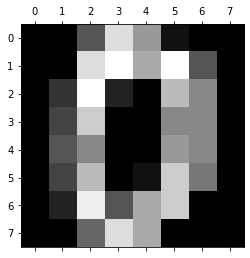

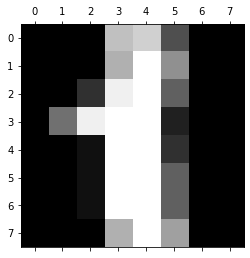

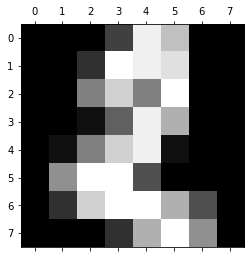

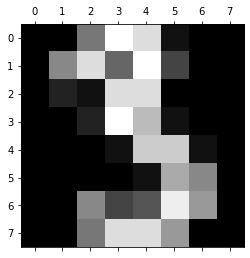

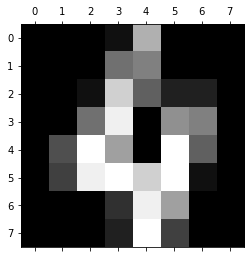

In [403]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [404]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [405]:
from sklearn.model_selection import train_test_split

In [406]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.3)

In [407]:
len(x_train)

1257

In [408]:
len(x_test)

540

In [409]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [410]:
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [411]:
model.score(x_test,y_test)

0.9481481481481482

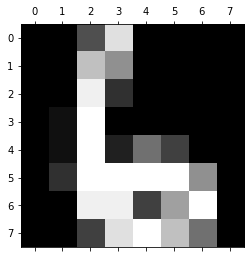

In [412]:
plt.matshow(digits.images[67])

In [413]:
digits.target[67]

6

In [414]:
model.predict([digits.data[67]])

array([6])

In [415]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [416]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  1,  0,  1,  3,  0],
       [ 0,  2,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1, 49,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 52,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 54,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 45,  2],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  2, 52]], dtype=int64)

Text(69.0, 0.5, 'Truth')

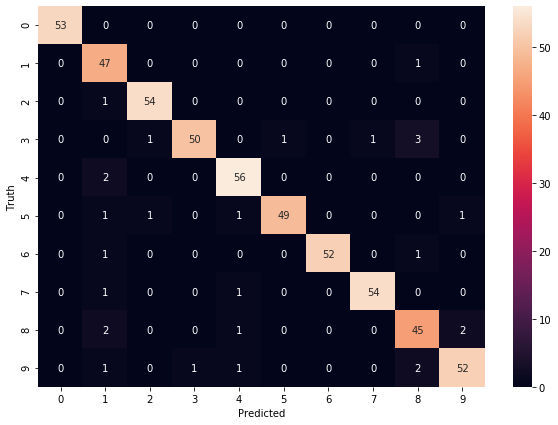

In [417]:
#for matrix visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#to check how well your model is doing or the diff btwn truth value and predicted value


In [418]:
#exercise
#iris flower